# Data pre-processing and exploration

## Wind Spatio-Temporal Dataset

The dataset we use in the following part is the [Wind Spatio-Temporal Dataset2](https://zenodo.org/records/5516550). We extract the values corresponding to the wind speed and the power for the 200 turbines. Such values are the considered multivariate time series. We also use the coordinates of the turbines to turn our time signals into a grap time series.

In [4]:
import pandas as pd

In [5]:
data_df = pd.read_csv("data/Wind_Turbines/Wind Spatio-Temporal Dataset2.csv")

/tmp/ipykernel_18846/3908433030.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262

In [5]:
data_df.head(5)

,Unnamed: 0,Turbine1,Turbine2,Turbine3,Turbine4,Turbine5,Turbine6,Turbine7,Turbine8,Turbine9,...,Unnamed: 397,Unnamed: 398,Unnamed: 399,Unnamed: 400,Unnamed: 401,Unnamed: 402,Unnamed: 403,Unnamed: 404,Unnamed: 405,Unnamed: 406
0,Latitude,40.477244,40.475753,40.482172,40.476083,40.477691,40.476644,40.468356,40.467822,40.469174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Longitude,-88.798072,-88.795484,-88.779434,-88.779391,-88.772025,-88.767455,-88.771024,-88.767047,-88.762329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Time,Turbine1_Speed,Turbine1_Power,Turbine2_Speed,Turbine2_Power,Turbine3_Speed,Turbine3_Power,Turbine4_Speed,Turbine4_Power,Turbine5_Speed,...,Turbine199_Speed,Turbine199_Power,Turbine200_Speed,Turbine200_Power,Mast1_Speed,Mast1_Direction,Mast2_Speed,Mast2_Direction,Mast3_Speed,Mast3_Direction
4,9/1/2010 0:00,8.9,0.432136263,8.9,0.463000477,7.7,0.329147427,9.2,0.542983188,2.7,...,10.2,0.56875,10.1,0.60038127,7.58,182,9.5,217.1,9.47,197.6


### Extract the turbine coordinates

In [20]:
coord = data_df.iloc[0:2].copy(deep=True)
col_names = ["Unnamed: 0"] + [f'Turbine{i}' for i in range(1, 201)]
coord = coord[col_names]
coord.set_index('Unnamed: 0', inplace=True)
coord.index.name = None

In [21]:
coord.to_csv('data/turbines_coord.csv')

### Extract the speed and power time series per turbine

In [6]:
speed_power_df = data_df.iloc[3:len(data_df.index)].copy(deep=True)
speed_power_df.columns = speed_power_df.loc[3]
speed_power_df.drop(speed_power_df.index[0], inplace=True)
speed_power_df = speed_power_df.drop(['Mast1_Speed', 'Mast2_Speed', "Mast3_Speed", "Mast1_Direction", 'Mast2_Direction', "Mast3_Direction"], axis=1)

In [ ]:
speed_power_df.to_csv('data/turbines_speed_power.csv')

## CHB-MIT_Scalp_EEG

The following data comes from [CHB-MIT Scalp EEG Database](https://physionet.org/content/chbmit/1.0.0/chb01/#files-panel). It consists of a collection of EEG recordings of 22 pediatric subjects with intractable seizures. For each subject, a number of *.edf* files were recorded containing generally one hour of digitized EEG signals, recorded with International 10-20 system of EEG electrode positions and nomenclature.

Please refer to this [learning eeg presentation](https://www.learningeeg.com/montages-and-technical-components) for details about the nomenclature of the channels.

### Opening and vizualization of the data

In [1]:
from pyedflib import highlevel

In [2]:
signals_03, signal_headers_03, header_03 = highlevel.read_edf('data/CHB-MIT_Scalp_EEG/chb01_03.edf')
signals_03.shape

(23, 921600)

In [17]:
sample_freq = signal_headers_03[0]['sample_rate']

/tmp/ipykernel_24353/3234573190.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


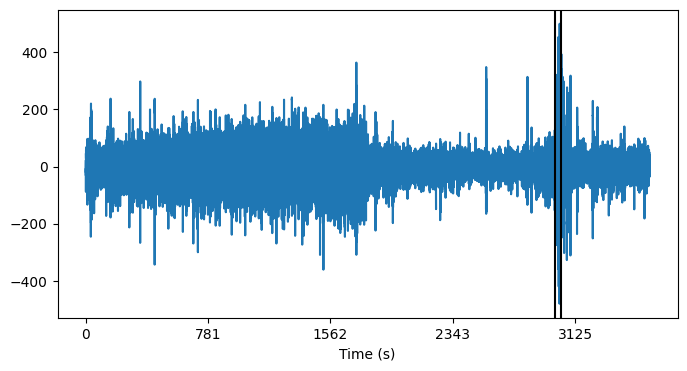

In [39]:
import matplotlib.pyplot as plt

seizure_start = 2996
seizure_end = 3036

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(signals_03[0, :])
new_labels = [str(int(label._text)//sample_freq)[:-2] for label in ax.get_xticklabels()[1:-1]]
ax.axvline(x=sample_freq*seizure_start, color='k')
ax.axvline(x=sample_freq*seizure_end, color='k')
ax.set_xticks(ax.get_xticks()[1:-1], new_labels)
ax.set_xlabel('Time (s)')
fig.show()